In [1]:
from os.path import exists,splitext,abspath,dirname,basename
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
import seaborn as sns
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/kclabws1/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [ ]:
data_combo=pd.read_csv('/home/kclabws1/Documents/propro/writ/prjs/2_chem_chap_screens/data/yeast_gfp_half_life/data/160309_sdsd_replicates/160309_sdsd_replicates.xlsx.combo')
data_combo['SD1_rescaled']=data_combo['SD1']*50
data_combo['SD2_rescaled']=data_combo['SD2']*50
data_combo=data_combo.drop(['Unnamed: 0','DBID','gene_id','name','cai','SD1','SD2'],axis=1)

In [ ]:

data_combo.loc[((~data_combo.loc[:,'SD1_rescaled'].isnull()) & (~data_combo.loc[:,'SD2_rescaled'].isnull())),:]


In [ ]:
# data_repli[lbl]=data_lbl['NiAcutlog'].fillna(0)
sns.pairplot(data_combo.loc[((~data_combo.loc[:,'SD1_rescaled'].isnull()) & (~data_combo.loc[:,'SD2_rescaled'].isnull())),:], kind="reg")

In [ ]:
# higher turnover rates for for optimal codons containig proteins (high fop )
# protein systhesis rate is the strongest factor diciding the turnover rate

In [2]:
def plotreg(data_combo,x_col,y_col):
    data_combo=data_combo.iloc[0:95,:]
    data_combo.loc[(data_combo.loc[:,x_col]<-0.006) | (data_combo.loc[:,x_col]>-0.002),x_col] = np.nan
    data_combo.loc[(data_combo.loc[:,y_col]<-0.006) | (data_combo.loc[:,y_col]>-0.002),y_col] = np.nan

    # data_combo.plot(kind="scatter", x="SD1",y="SD2")
    ax=sns.jointplot(x=x_col, y=y_col, data=data_combo,color="g",kind="reg")
    # ax.set_xlim(-0.006,-0.002)
    # ax.set_ylim(-0.006,-0.002)
    return ax

In [12]:
def anaplotter(xls_fh):
    lbls=pd.read_excel(xls_fh,"lbls")
    x_col=lbls.iloc[0,0]
    y_col=lbls.iloc[1,0]
    data_combo=pd.read_csv(xls_fh+'.combo')
    sns.set(font_scale=1.5)
    ax=plotreg(data_combo,x_col,y_col)
    ax.savefig("%s/fig_reg_%s.png" % (dirname(xls_fh), splitext(basename(xls_fh))[0]))

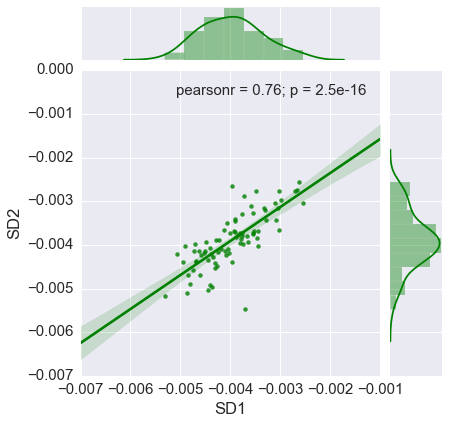

In [13]:
xls_fh="/home/kclabws1/Documents/propro/writ/prjs/2_chem_chap_screens/data/yeast_gfp_half_life/data/160309_sdsd_replicates_ana160425/160309_sdsd_replicates.xlsx"
anaplotter(xls_fh)

/home/kclabws1/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/pandas/core/indexing.py:461: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


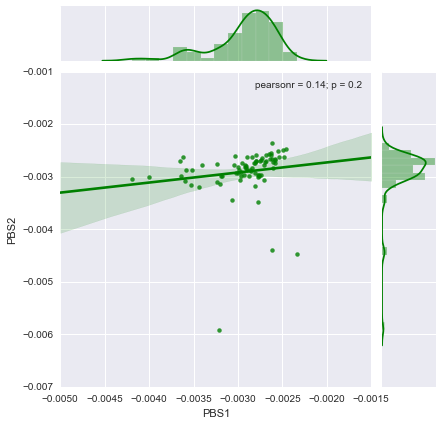

In [4]:
xls_fh="/home/kclabws1/Documents/propro/writ/prjs/2_chem_chap_screens/data/yeast_gfp_half_life/data/160423_pbspbs_replicates/160423_pbspbs_replicates.xlsx"
anaplotter(xls_fh)

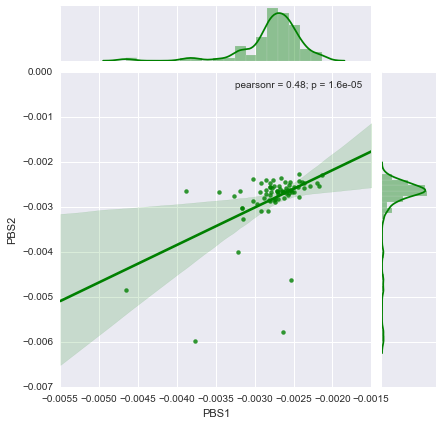

In [5]:
xls_fh="/home/kclabws1/Documents/propro/writ/prjs/2_chem_chap_screens/data/yeast_gfp_half_life/data/160424_pbspbs_replicates/160424_pbspbs_replicates.xlsx"
anaplotter(xls_fh)

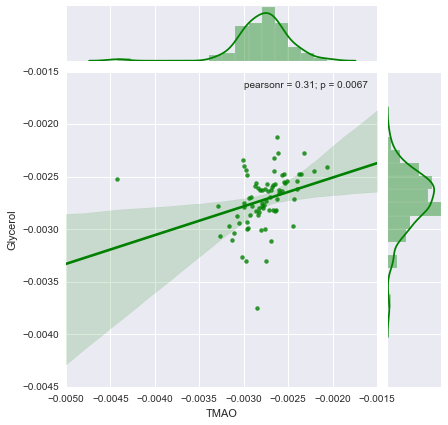

In [7]:
xls_fh="/home/kclabws1/Documents/propro/writ/prjs/2_chem_chap_screens/data/yeast_gfp_half_life/data/160427_tmao_glyc_run1/160427_tmao_glyc_run1.xlsx"
anaplotter(xls_fh)

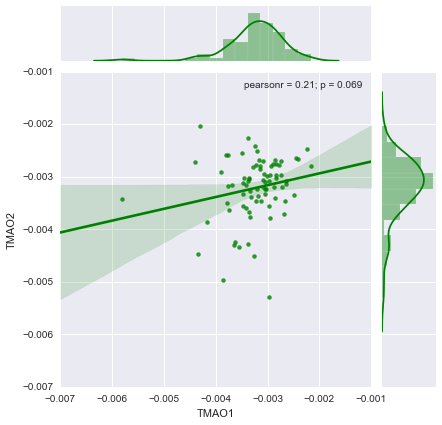

In [8]:
xls_fh="/home/kclabws1/Documents/propro/writ/prjs/2_chem_chap_screens/data/yeast_gfp_half_life/data/160430_tmaotmao_replicates/160430_tmaotmao_replicates.xlsx"
anaplotter(xls_fh)

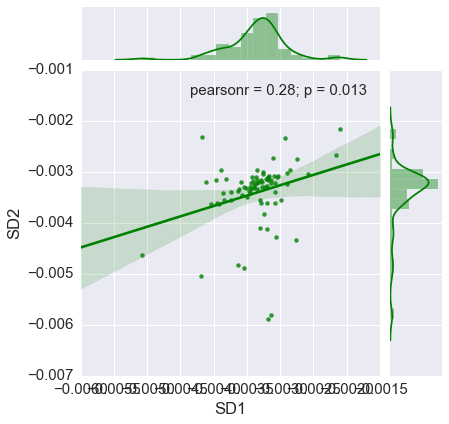

In [14]:
xls_fh="/home/kclabws1/Documents/propro/writ/prjs/2_chem_chap_screens/data/yeast_gfp_half_life/data/160505_sdsd_replicates/160505_sdsd_replicates.xlsx"
anaplotter(xls_fh)